In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# Any results you write to the current directory are saved as output.

In [2]:
df_startups = pd.read_csv("../input/startups/startup_funding.csv",index_col=0)

In [3]:
print(df_startups.shape)
print(df_startups.nunique())
print(df_startups.info())

(3009, 9)
Date                1009
StartupName         2439
IndustryVertical     811
SubVertical         1912
CityLocation         109
InvestorsName       2380
InvestmentnType       50
AmountinUSD          458
Remarks               72
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3009 entries, 0 to 3057
Data columns (total 9 columns):
Date                3009 non-null object
StartupName         3009 non-null object
IndustryVertical    2838 non-null object
SubVertical         2073 non-null object
CityLocation        2829 non-null object
InvestorsName       2986 non-null object
InvestmentnType     3006 non-null object
AmountinUSD         2049 non-null object
Remarks             419 non-null object
dtypes: object(9)
memory usage: 235.1+ KB
None


In [4]:
df_startups.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentnType,AmountinUSD,Remarks
Sr No,,,,,,,,,
0,05-09-2019,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,"45,00,000",NaN
1,04-09-2019,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series A,"33,00,000",NaN
2,04-09-2019,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,"60,00,000",NaN
3,04-09-2019,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,pre-series A,"50,00,000",NaN
4,04-09-2019,75F,IoT,Building automation system,Burnsville,Breakthrough Energy Ventures,Series A,"1,80,00,000",NaN


In [5]:
df_startups.shape

(3009, 9)

In [6]:
print("Data discription")
print(df_startups.isnull().sum())



Data discription
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         180
InvestorsName         23
InvestmentnType        3
AmountinUSD          960
Remarks             2590
dtype: int64


Major ****Investors

In [7]:
Investors = df_startups.InvestorsName.value_counts()

print("Number of Investors")
print(Investors[:20])

Number of Investors
Undisclosed Investors       104
Ratan Tata                   25
Indian Angel Network         23
Kalaari Capital              16
Group of Angel Investors     15
Sequoia Capital              15
Accel Partners               12
Undisclosed                  11
Brand Capital                11
Venture Catalysts            11
SAIF Partners                10
RoundGlass Partners          10
Info Edge (India) Ltd         9
Nexus Venture Partners        9
Blume Ventures                8
Trifecta Capital              8
Tiger Global                  8
Unitus Seed Fund              8
YouWeCan Ventures             7
Matrix Partners               7
Name: InvestorsName, dtype: int64


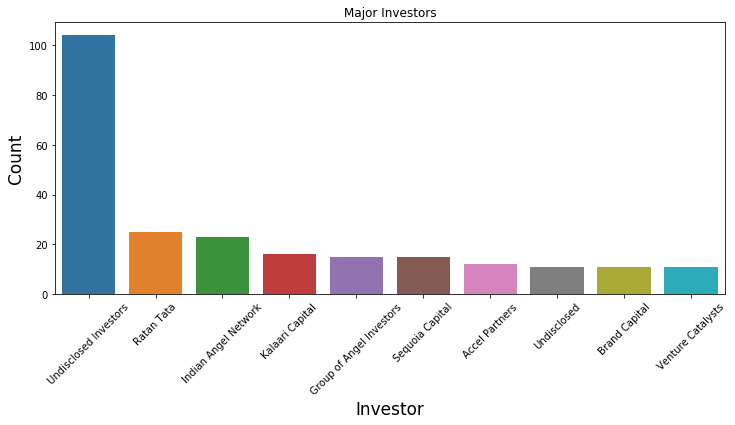

In [8]:
plt.figure(figsize = (12,5))
plt.title("Major Investors")
g=sns.barplot(x=Investors.index[:10], y=Investors.values[:10])

locs, labels = plt.xticks()
plt.setp(labels, rotation =45)
g.set_xlabel("Investor", fontsize=17)
g.set_ylabel("Count", fontsize=17)
plt.show()

In [9]:
df_startups["CityLocation"]= df_startups["CityLocation"].replace("Gurugram", "Gurgaon")
#Formatting of data.

Name of the city
Bangalore    700
Mumbai       564
New Delhi    420
Gurgaon      327
Bengaluru    132
Pune         103
Hyderabad     99
Chennai       96
Noida         90
Ahmedabad     38
Name: CityLocation, dtype: int64


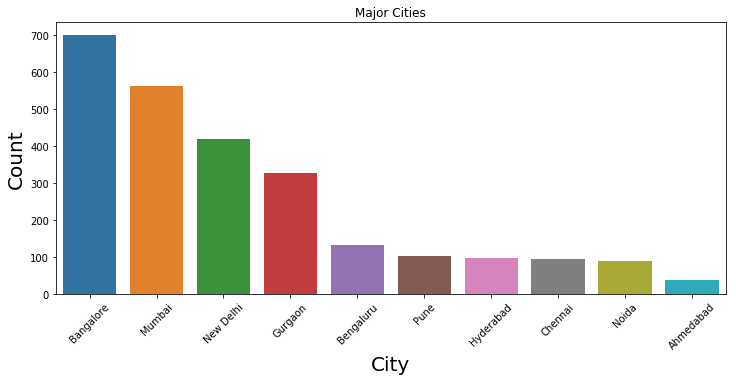

In [10]:
City = df_startups.CityLocation.value_counts()
print ("Name of the city")
print (City[:10])

plt.figure(figsize = (12, 5))
plt.title ("Major Cities")
sns.barplot(x=City.index[:10], y=City.values[:10])
           
plt.xticks(rotation = 45)
plt.xlabel("City", fontsize = 20)
plt.ylabel("Count", fontsize=20)
plt.show()

In [11]:
vertical = df_startups.IndustryVertical.value_counts()
print("Name of the Industry Veritcal")
print(vertical[:20])

Name of the Industry Veritcal
Consumer Internet       941
Technology              476
eCommerce               186
Healthcare               69
Finance                  61
ECommerce                61
Logistics                31
E-Commerce               25
Food & Beverage          23
Education                22
Ed-Tech                  14
E-commerce               11
IT                        8
Ecommerce                 8
FinTech                   6
Fin-Tech                  6
Others                    6
Real Estate               6
Online Food Delivery      5
Logistics Tech            5
Name: IndustryVertical, dtype: int64
